In [22]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [2]:
df_produtos = pd.read_csv("../data/processados/produtos_fixa.csv")

In [3]:
df_produtos.head()

,ProdutoId,NomeInvestimento__c,NomeProduto__c,DataDeVencimento__c,DescricaoCarencia__c,DescricaoCotizacaoResgate__c,NomeIndexador__c,DescricaoLiquidacaoResgate__c,DiasVencimento__c,FiltroValorMinimo__c,PrazoCarencia__c,PrazoDias__c,PrecoUnitario__c,ResgateDias__c,TipoIndexador__c,Vencimento__c,Inativo__c,meses_vencimento,anos_vencimento,b_dias_vencimento
0,a0W3u000009PBddEAG,CDB,CDB POS 1,2020-11-16,No venc.,No dia,+ IPCA,No dia,283.0,5000.0,377.0,377.0,1.0,No venc.,IPCA,2020-11-16,False,9.433333,0.775342,"(-3.521, 503.2]"
1,a0W3u000009PBdeEAG,CDB,CDB POS 1,2021-11-16,No venc.,No dia,+ IPCA,No dia,648.0,5000.0,742.0,742.0,1.0,No venc.,IPCA,2021-11-16,False,21.600000,1.775342,"(503.2, 1007.4]"
2,a0W3u000009PBdfEAG,CDB,CDB POS 1,2022-11-16,No venc.,No dia,+ IPCA,No dia,1013.0,5000.0,1107.0,1107.0,1.0,No venc.,IPCA,2022-11-16,False,33.766667,2.775342,"(1007.4, 1511.6]"
3,a0W3u000009PBdgEAG,CDB,CDB POS 1,2024-11-18,No venc.,No dia,+ IPCA,No dia,1746.0,5000.0,1840.0,1840.0,1.0,No venc.,IPCA,2024-11-18,False,58.200000,4.783562,"(1511.6, 2015.8]"
4,a0W3u000009PBdhEAG,CDB,CDB PRE 1,2020-11-03,No venc.,No dia,PRÉ,No dia,270.0,5000.0,361.0,361.0,1.0,No venc.,Pré fixado,2020-11-03,False,9.000000,0.739726,"(-3.521, 503.2]"


In [4]:
df_produtos.columns

Index(['ProdutoId', 'NomeInvestimento__c', 'NomeProduto__c',
       'DataDeVencimento__c', 'DescricaoCarencia__c',
       'DescricaoCotizacaoResgate__c', 'NomeIndexador__c',
       'DescricaoLiquidacaoResgate__c', 'DiasVencimento__c',
       'FiltroValorMinimo__c', 'PrazoCarencia__c', 'PrazoDias__c',
       'PrecoUnitario__c', 'ResgateDias__c', 'TipoIndexador__c',
       'Vencimento__c', 'Inativo__c', 'meses_vencimento', 'anos_vencimento',
       'b_dias_vencimento'],
      dtype='object')

In [5]:
df_ml = df_produtos[['b_dias_vencimento',
                    'FiltroValorMinimo__c', 'DescricaoCarencia__c']]

In [6]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_ml.isnull().sum()

b_dias_vencimento       0
FiltroValorMinimo__c    0
DescricaoCarencia__c    0
dtype: int64

In [8]:
df_ml.shape

(8278, 3)

In [9]:
cluster_model = ClusterModel(df_ml,do_pca=False)

In [10]:
clusters, model = cluster_model.dbscan()

In [11]:
clusters.head()

,b_dias_vencimento,FiltroValorMinimo__c,DescricaoCarencia__c,cluster
0,"(-3.521, 503.2]",5000.0,No venc.,0
1,"(503.2, 1007.4]",5000.0,No venc.,1
2,"(1007.4, 1511.6]",5000.0,No venc.,2
3,"(1511.6, 2015.8]",5000.0,No venc.,3
4,"(-3.521, 503.2]",5000.0,No venc.,0


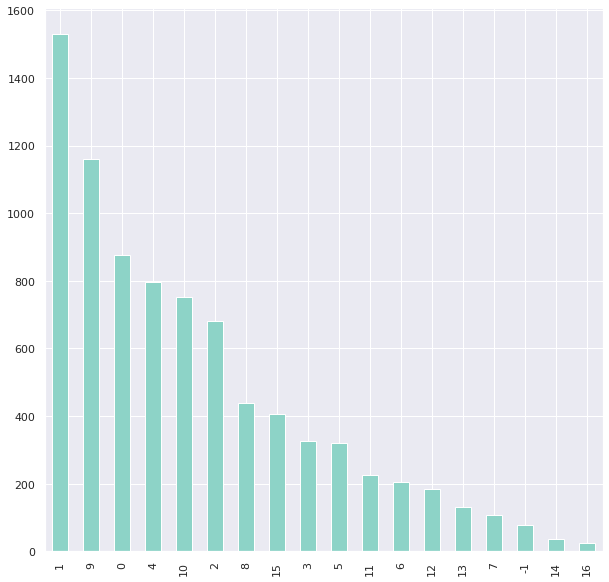

In [12]:
plt.figure(figsize=(10,10))
clusters['cluster'].value_counts().plot(kind='bar')

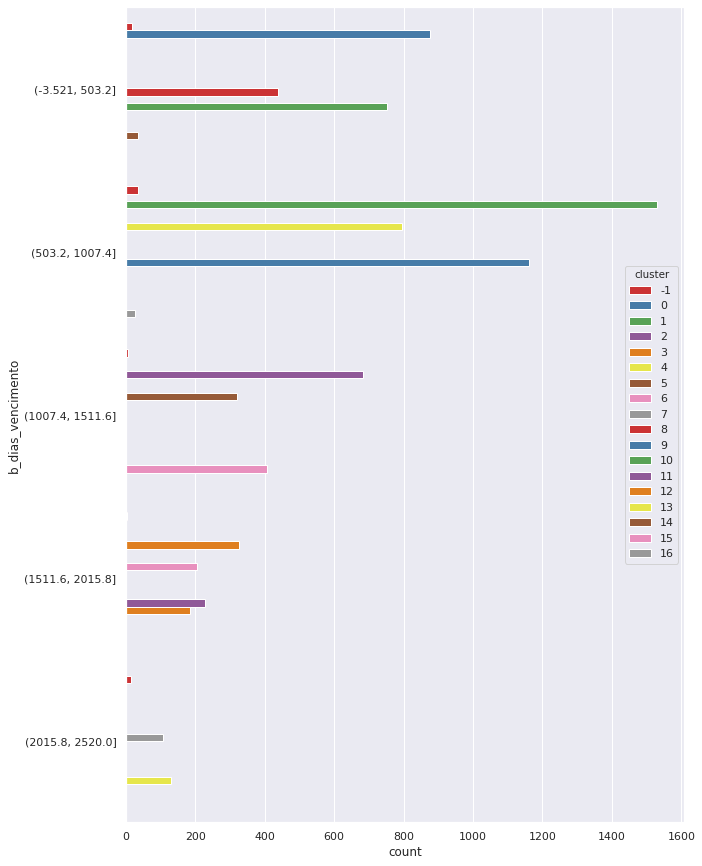

In [28]:
plt.figure(figsize=(10,15))
sns.countplot( y="b_dias_vencimento", hue="cluster", data=clusters, palette='Set1')

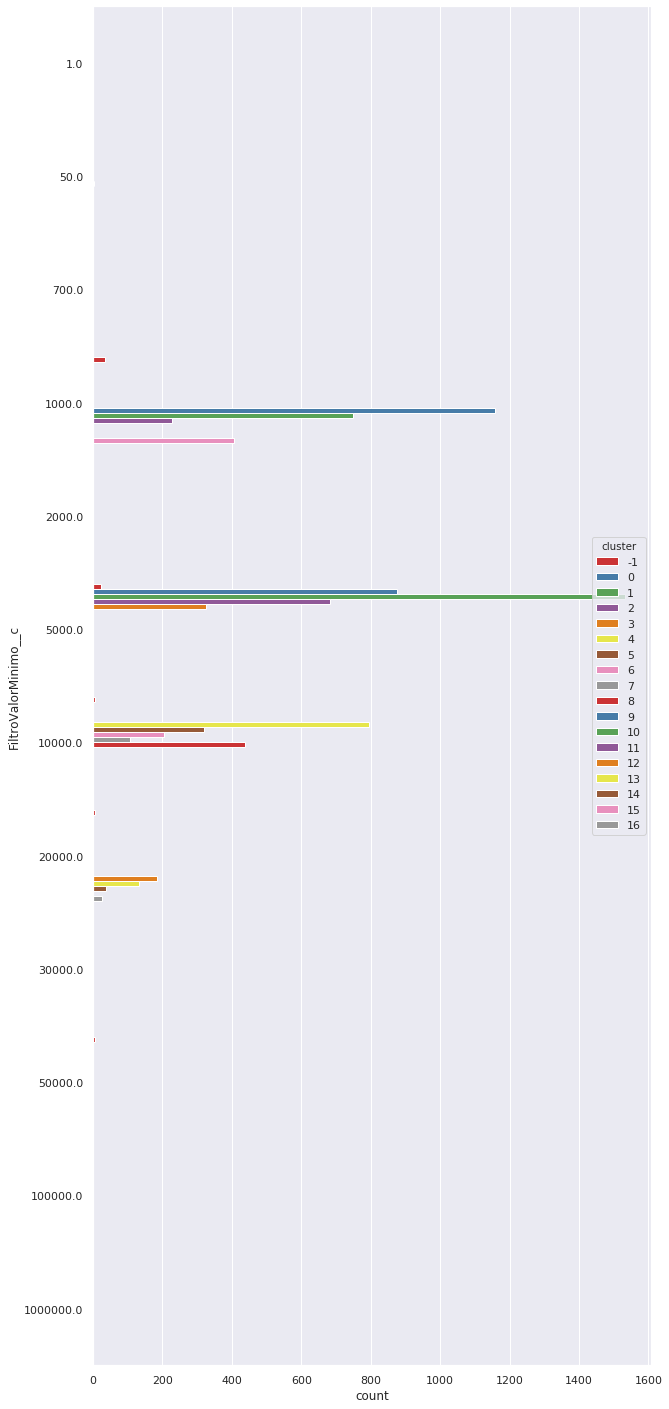

In [29]:
plt.figure(figsize=(10,25))
sns.countplot(y ="FiltroValorMinimo__c", hue="cluster", data=clusters, palette='Set1')

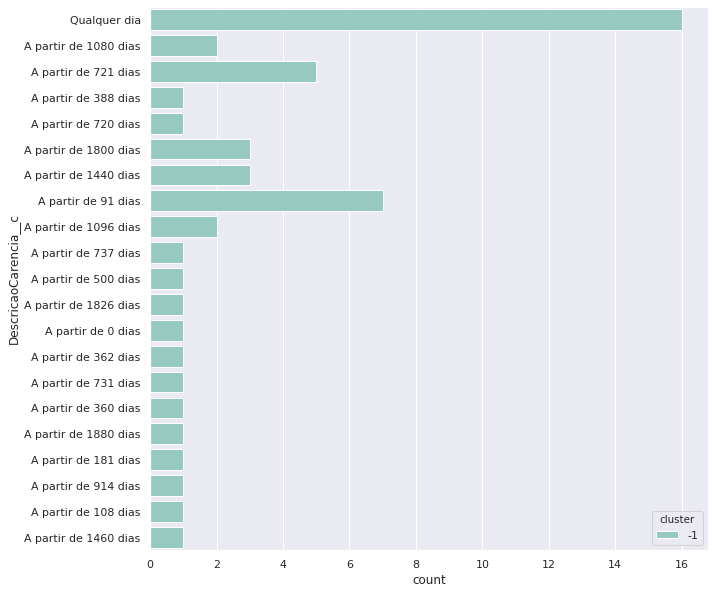

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(y="DescricaoCarencia__c", hue="cluster", data=clusters.query('DescricaoCarencia__c != "No venc."'))